# Çoklu Lineer Regresyon Proje

## Araba Fiyat Tahmini

### Problem Tanımı:

1980'lerde Uzakdoğu'dan bir araba üreticisi, Amerika pazarına girmek istemektedir.

Araba fiyatları üzerinde hangi faktörlerin önemli olduğunu öğrenmek için bir danışmanlık firması ile anlaşırlar.

Öğrenmek istedikleri:
* Arabaların fiyatlarını belirlemede hangi değişken/değişkenler önemlidir
* Bu değişkenler, araba fiyatlarını ne ölçüde etkilemektedir.

Bu talepler doğrultusunda, danışmanlık firması çeşitli markalar ve modeller üzerinden veriler toplamıştır.

Bizim görevimiz fiyatın hangi değişkenlere göre ve ne ölçüde değiştiğini gösteren bir model hazırlamak ve sunmaktır.

https://archive.ics.uci.edu/ml/datasets/Automobile

#### Kütüphaneleri import edelim

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline   
#Bu kod satırı oluşturulan görselleri görmek 
#için her defasında “plt.show()” satırını yazmayı önlüyor.

#Birçok Jupyter defter kullanıcısı, defterin başında %matplotlib inline komutunu vermeyi tercih eder. 
#Bu sayede ürettiğiniz matplotlib grafikleri defterin içine gömülür ve tam bir belge oluşturmanızı sağlar.

In [2]:
# warning mesajları için
import warnings
warnings.simplefilter(action="ignore",category=Warning)
#Warning gösterimini kapatmak için import ettik.

#### Veriyi Anlayalım

In [3]:
df = pd.read_csv("Automobile.csv")

In [4]:
#ilk 5 satır defauld
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# genel bilgiler

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# numerik kolonlara ait istatistik    sadece sayısal kolonların değerlerini verir.
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# verinin şekli (satır, sütun)

df.shape

(205, 26)

In [8]:
# toplam gözlem sayısı (n) satır sayısı

len(df)

205

In [9]:
# sütunlar
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
# toplam sütun sayısı

len(df.columns)

26

In [11]:
# kaç adet numerik sütun var
# price (y) da numerik bir sütun

len(df.describe().columns)   #16nın içinde y değeri de var.

16

Dolayısı ile data içinde:
* Toplam 26 sütun var
* Bunlardan 25'i girdi (input) sütunları, 1'i çıktı (y) sütunu
* Girdi sütunlarının 15'i sayısal sütun, 10'u kategorik

In [12]:
# nirmerik kolonların ne olduğunu istersek.

df.describe().columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

#### Veri Ön İşleme

In [13]:
# her sütun içindeki tekil (unique) veri adedini görelim

for col in df.columns:
    print(col,df[col].nunique())

car_ID 205
symboling 6
CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
wheelbase 53
carlength 75
carwidth 44
carheight 49
curbweight 171
enginetype 7
cylindernumber 7
enginesize 44
fuelsystem 8
boreratio 38
stroke 37
compressionratio 32
horsepower 59
peakrpm 23
citympg 29
highwaympg 30
price 189


In [14]:
# Kategorik olan sütunlar için değerleri görelim

for col in df.columns:
    values=[]
    
    #nümerik olmayanlar ->kategorik 
    if col not in df.describe().columns:
        for val in df[col].unique():
            values.append(val)
        print("{0} -> {1}".format(col,values))   
#Metin türü (string) bir verinin istediğimiz formatta olmasını format() metodunu kullanarak sağlayabiliriz. 
#Bu fonksiyon string değerin istediğimiz biçimde yazdırılmasını sağlayacaktır.

CarName -> ['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se', 'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl', 'honda accord', 'honda civic 1300', 'honda prelude', 'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l', 'mazda glc custom', 'buick electra 225 custom', 'buick century luxus (sw)'

In [15]:
# Model adlarını görelim
# data['CarName']

df.CarName

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

Gördüğünüz gibi model adları çok karmaşık. İlk kelimeler üretici adı, diğerleri model adı.

Üretici Adı - Model Adı şeklinde ayırıp Üretici Adlarını alalım.

In [16]:
# manufacturer -> üretici adları
manufacturer = df["CarName"].apply(lambda x: x.split(" "))
manufacturer

#apply fonksiyonunu bir dataframe verirsek dataframein içerisindeki her bir data üzerinde döner

0            [alfa-romero, giulia]
1           [alfa-romero, stelvio]
2      [alfa-romero, Quadrifoglio]
3                  [audi, 100, ls]
4                    [audi, 100ls]
                  ...             
200            [volvo, 145e, (sw)]
201                 [volvo, 144ea]
202                 [volvo, 244dl]
203                   [volvo, 246]
204                 [volvo, 264gl]
Name: CarName, Length: 205, dtype: object

In [17]:
#liste içinden ilk elemanı almak için
# kendimize manufacturer diye bir sütün oluşturduk.
manufacturer = df["CarName"].apply(lambda x: x.split(" ")[0])
manufacturer

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [18]:
#!!!!Hiçbir zaman orijinal datayı değitirme kopyasını al
# şimdi df'i kopyalayıp üzerinde değişiklik yapmaya başlayalım

data = df.copy()

In [19]:
# "data"nın ilk 5 satırı

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
# bu CarName sütununu data'dan çıkaralım

data.drop(columns=["CarName"], axis=1 ,inplace=True)

#drop -> silme işlemi
#columns=["CarName"] -> sileceğimiz kolonun adı
#axis=1 -> y ekseni üzerinde sil
#inplace=True -> isleme işlemini "data" da yap

In [21]:
#CarName kolonu "data"dan silindi.
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
#Orijinal datamızda CarName kolonu hala var çünkü biz kopyaladığımız(data) dan sildik.
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
# şimdi bu yeni manufacturer sütununu ekleyelim

data.insert(3,"manufacturer",manufacturer)

#insert -> ekleme yapar.
# insert(3 -> 3. sütuna ekle. 

In [24]:
#kontrol edelim.
data.head()
#doğru manufacturer isimli kolonumuzu datamıza eklemiş.

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
# hangi üreticinin kaç adet aracı var görelim

data.groupby(by="manufacturer").count()

#count() -> sayacak
#Pandas groupby , verileri kategorilere göre gruplandırmak ve kategorilere bir fonksiyon uygulamak için kullanılır. 
#Ayrıca verileri verimli bir şekilde toplamaya yardımcı olur.

#Pandas dataframe.groupby()işlevi, verileri bazı kriterlere göre gruplara ayırmak için kullanılır. 
#panda nesneleri herhangi bir eksende bölünebilir. 
#Gruplandırmanın soyut tanımı, etiketlerin grup adlarına eşlenmesini sağlamaktır.

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
manufacturer,,,,,,,,,,,,,,,,,,,,,
Nissan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alfa-romero,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
audi,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
bmw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
buick,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
chevrolet,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
dodge,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
honda,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
isuzu,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


Üretici adlarında hatalar var
* toyota, toyouta
* mazda, maxda
* Nissan, nissan
* ...

Bunları düzeltelim:

In [26]:
# önce tüm değerleri görelim

data.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [27]:
# büyük - küçük harfleri düzeltelim
#hepsini küçük harf yapalım

data.manufacturer = data.manufacturer.str.lower()


In [28]:
data.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [29]:
# hatalı marka adlarını düzeltelim

data.replace({
    "maxda"     : "mazda",
    "porcshce"  : "porsche",
    "toyouta"   : "toyota", 
    "vokswagen" : "vw",
    "volkswagen": "vw"
},inplace=True)

#replace kelimesi Türkçede ‘değiştirmek, yerine koymak’ gibi anlamlar taşır. 
#İşte bu metodun yerine getirdiği görev de tam olarak budur. Yani bu metodu kullanarak bir karakter 
#dizisi içindeki karakterleri başka karakterlerle değiştirebileceğiz.

In [30]:
data.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vw', 'volvo'], dtype=object)

In [31]:
#datayı tekrar yazdıralım.
data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Tekli (Univariate) Analiz

Değişkenlere tek tek kendi içlerinde bakıp nasıl göründüğünü inceleyelim:

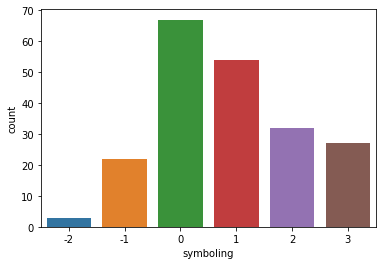

In [32]:
# symboling -> sigorta riski

sns.countplot(data.symboling)
plt.show()

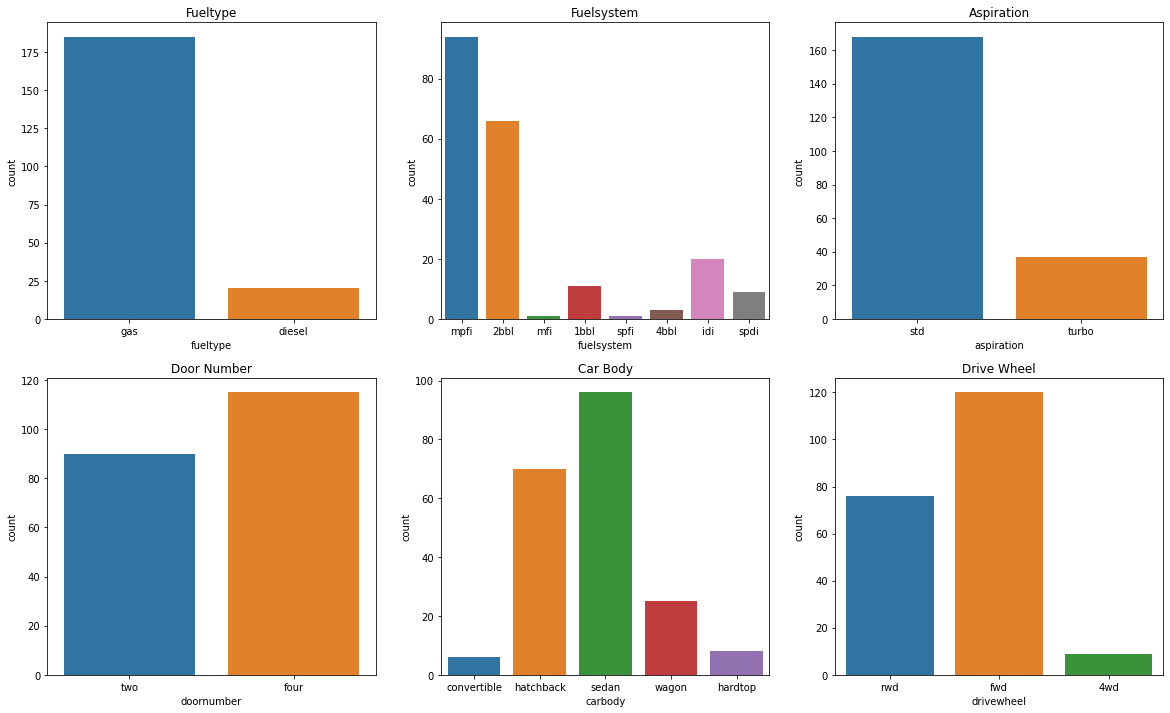

In [33]:
fig = plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
plt.title("Fueltype")
sns.countplot(data.fueltype)
#benzinli (gas) arabalar çoğunlukta


plt.subplot(2,3,2)
plt.title("Fuelsystem")
sns.countplot(data.fuelsystem)
#mpfi (multi point fuel injection) en .ok tercih edilen , yeni teknoloji

plt.subplot(2,3,3)
plt.title("Aspiration")
sns.countplot(data.aspiration)
#çoğunlukla standart beslemeli

plt.subplot(2,3,4)
plt.title("Door Number")
sns.countplot(data.doornumber)
#çoğunlukla 4 kapılı

plt.subplot(2,3,5)
plt.title("Car Body")
sns.countplot(data.carbody)
#çoğunluk sedan

plt.subplot(2,3,6)
plt.title("Drive Wheel")
sns.countplot(data.drivewheel)
#çekiş sistemi , standart çeker .oğunlukta

plt.show()  #yazmasakta veriyor.


#### İkili (Bivariate) Analiz

Şimdi değişkenlerin Fiyat'ı nasıl etkilediğini görmeye çalışalım:

In [34]:
data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


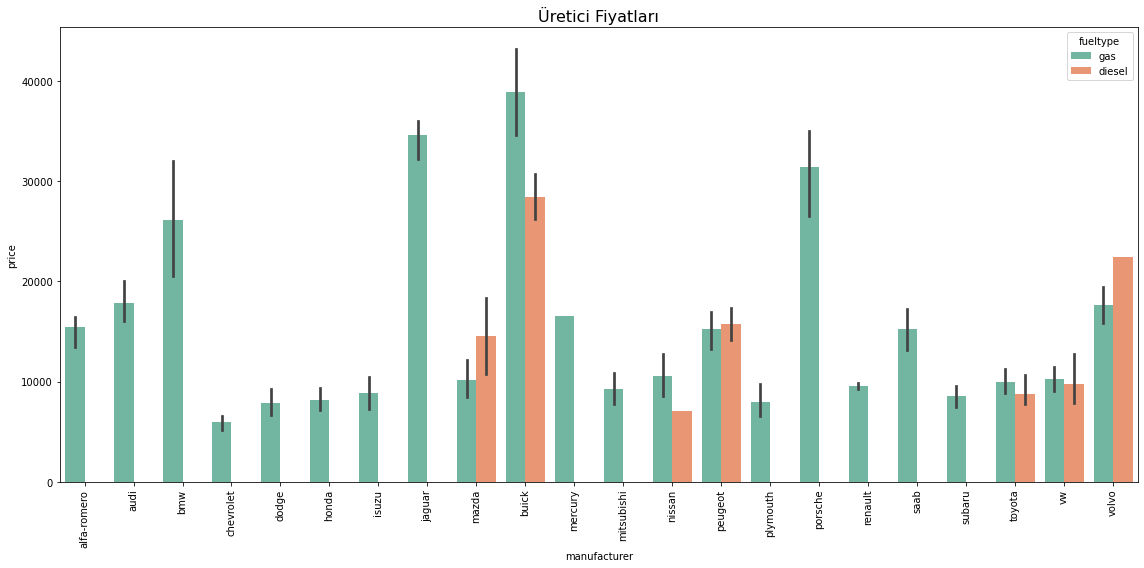

In [35]:
# Üretici bazlı ortalama fiyatlar

plt.figure(figsize=(16,8))
plt.title("Üretici Fiyatları", fontsize=16)
sns.barplot(x=data.manufacturer, y=data.price,
             hue=data.fueltype,palette="Set2")
plt.xticks(rotation=90)  #x eksenindeki yazıları 90 derece döndür.
plt.tight_layout()


#hue=data.fueltype -> fueltype göre ikili grafik çiziyor.
#palette="Set2" -> renk paleti

**symboling:**

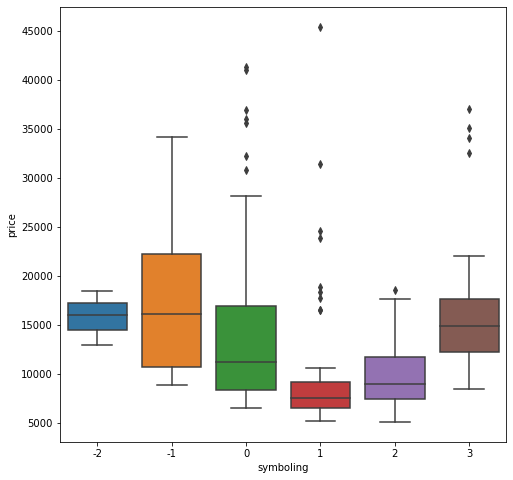

In [36]:
#price semboling ilişkisi
plt.figure(figsize=(8,8))
sns.boxplot(x=data.symboling,y=data.price)
plt.show()

**fueltype:**

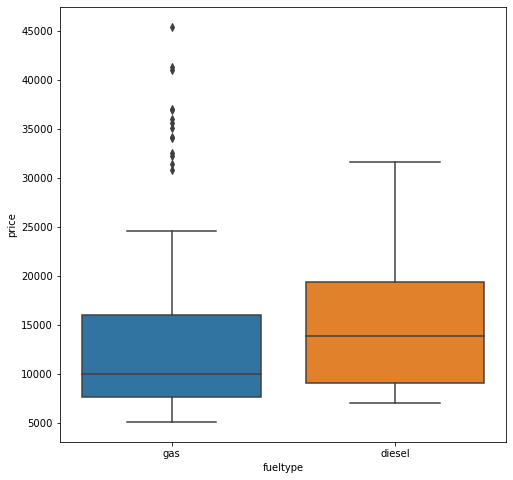

In [37]:
#price fueltype ilişkisi
plt.figure(figsize=(8,8))
sns.boxplot(x=data.fueltype,y=data.price)
plt.show()

**enginelocation:**

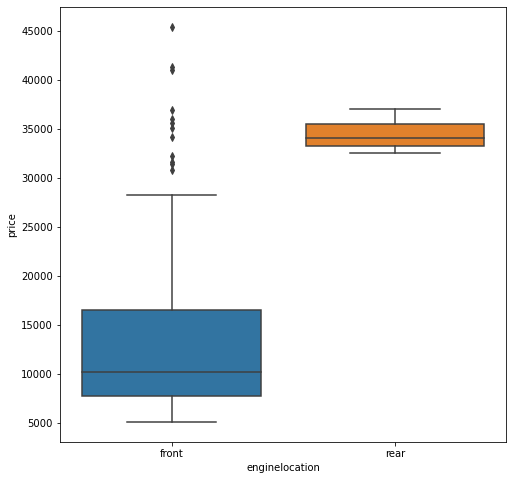

In [38]:
#price enginelocation ilişkisi
plt.figure(figsize=(8,8))
sns.boxplot(x=data.enginelocation,y=data.price)
plt.show()

# çoğunlukla motoru önde olan arabalar var ve fiyatları daha düşük
# motor arkada ise fiyat çok yüksek oluyor


**cylindernumber:**

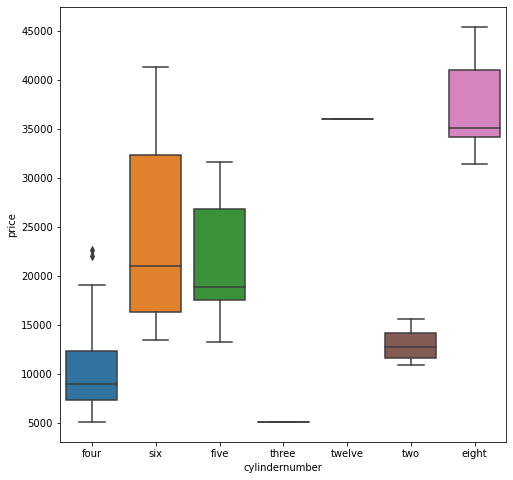

In [39]:
#price cylindernumber ilişkisi
plt.figure(figsize=(8,8))
sns.boxplot(x=data.cylindernumber,y=data.price)
plt.show()

# silindir sayısı arttıkça fiyatın görece arttığını söyleyebiliriz
# bakalım ne kadar doğru çıkacak


**Fiyatın Kendi İçinde Dağılımı:**

Şimdi sadece fiyatın nasıl kümelendiğine bakalım:

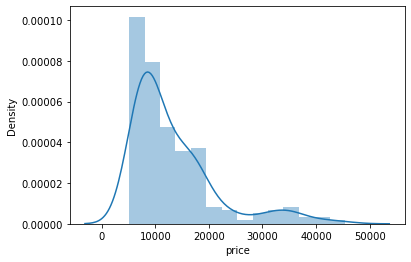

In [40]:
sns.distplot(data.price)
plt.show()

# fiyatın genelde 5.000 ile 20.000 USD arasında dağıldığı görülüyor


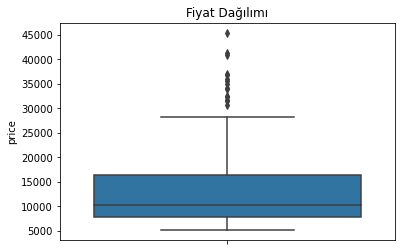

In [41]:
plt.title("Fiyat Dağılımı")
sns.boxplot(y=data.price)
plt.show()

# buradan da çok net bir şekilde dağılımın aralığı görülüyor


In [42]:
# fiyata istatistik veriler üzerinden bakalım

data.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Şimdi ikili grafiklerle (pair-plot) olarak tümünü görelim:

In [43]:
#kolonları yazdıralım
data.columns

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [44]:
# sadece şunları alalım bunları fiyatla basacağız

cols= ['wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [45]:
len(cols)

13

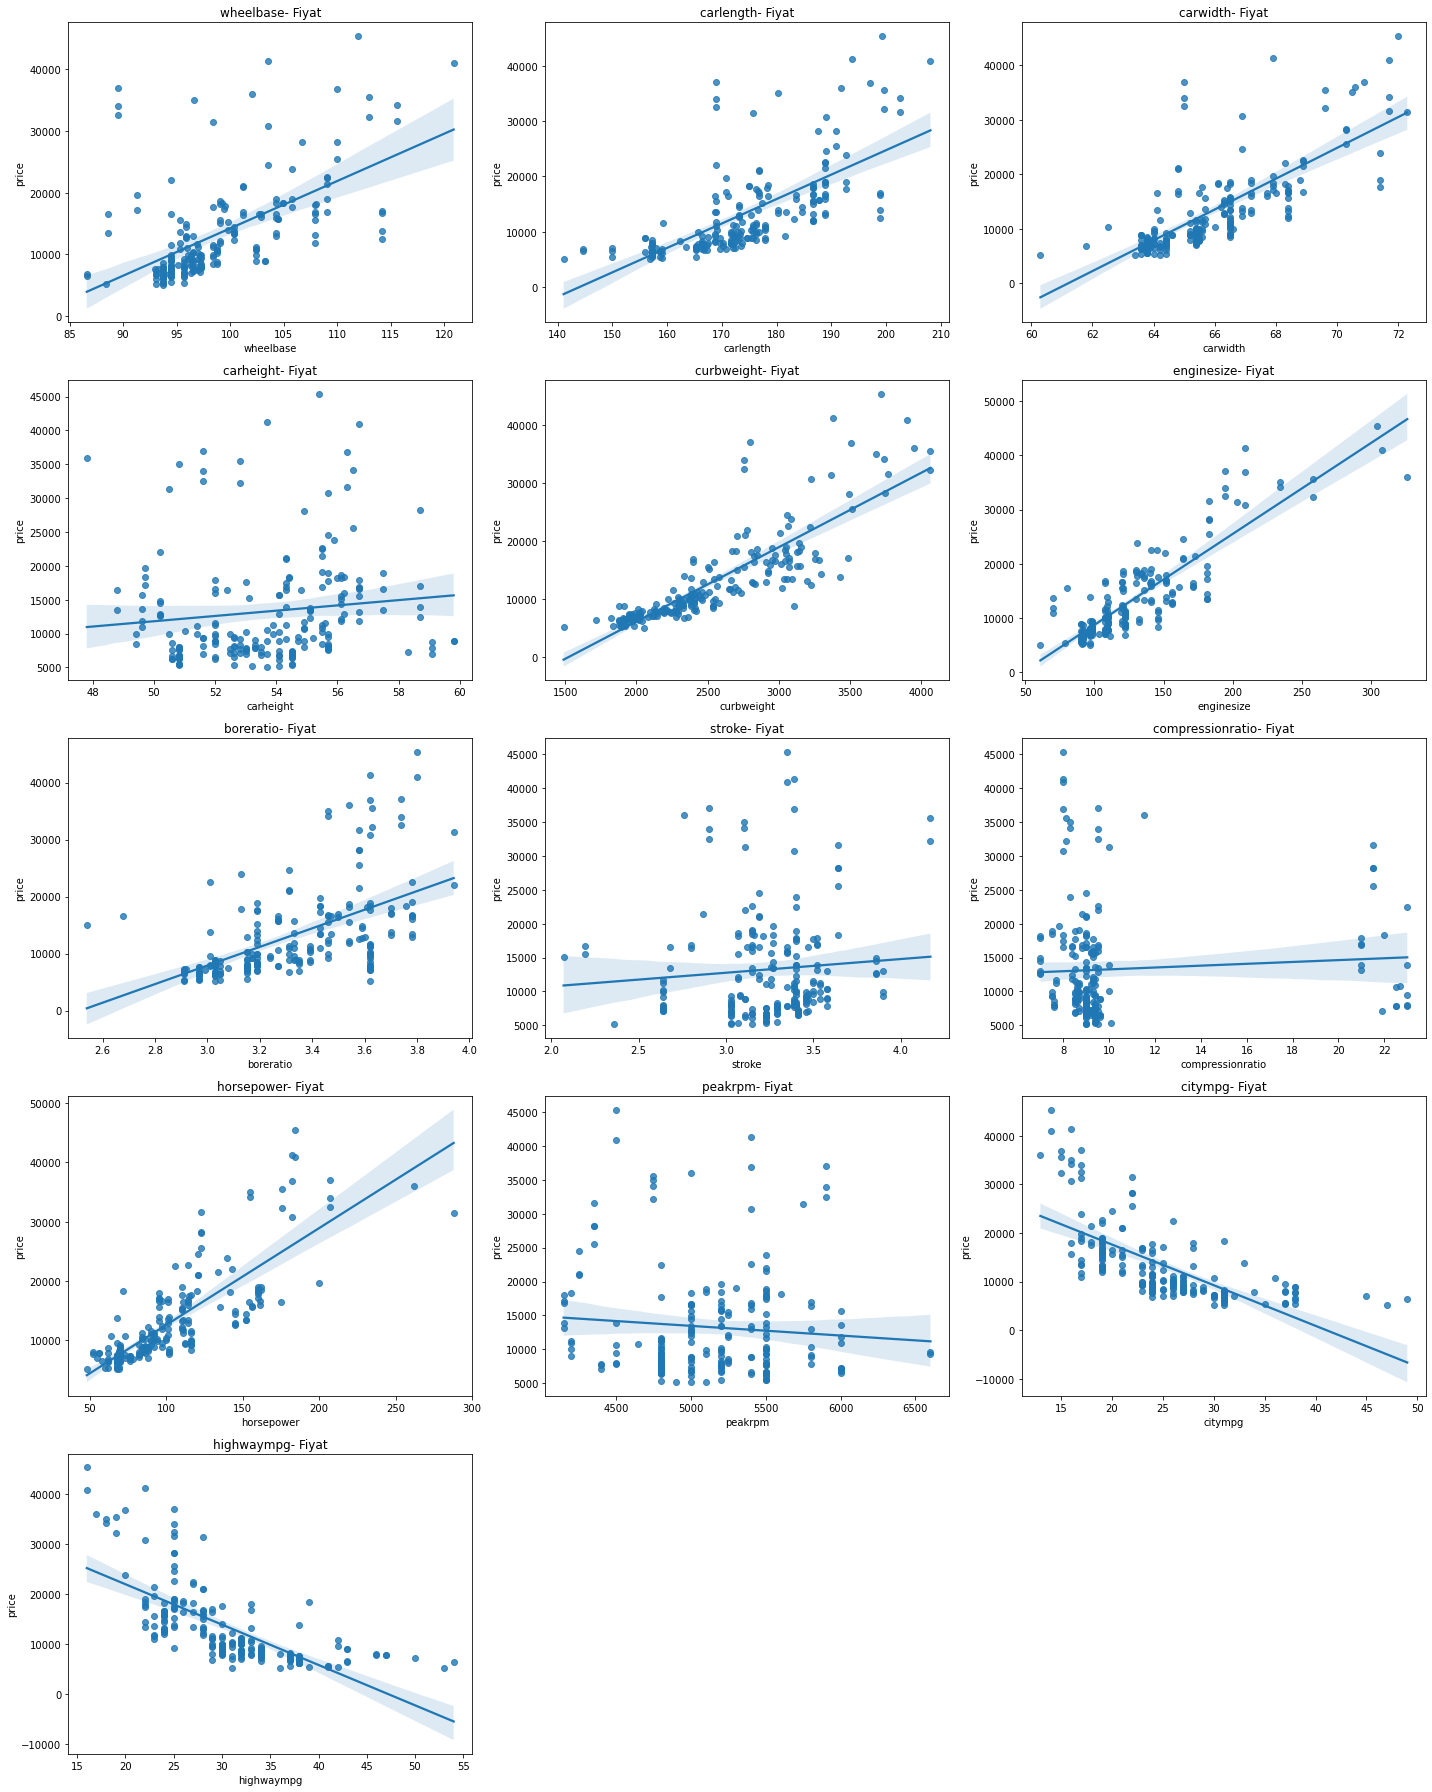

In [46]:
# regresyon doğruları ile ilişkiyi görelim

plt.figure(figsize=(20,25))

for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i] + "- Fiyat")
    sns.regplot(x=eval("data" +  "." +cols[i]),y=data.price)
plt.tight_layout()

Burada nerdeyse tüm değişkenleri önemli. Yani fiyat üzerinde etkisi olabilir.

Etkisiz olanlar:
* carheight
* stroke
* compression ratio
* peak rpm
* highway mpg
* city mpg

Bunları çıkarabiliriz.

In [47]:
#bütün kolonlar
data.columns

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [48]:
len(data.columns)

26

In [49]:
# yeni sütunlarla yeni data

data_new = data[[
       'car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'horsepower','price']]

In [50]:
data_new.columns

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'price'],
      dtype='object')

In [51]:
len(data_new.columns)

20

In [52]:
data_new.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,17450.0


Şimdi data_new içindeki tüm sütunlara ikili olarak (pair-plot) bakalım:

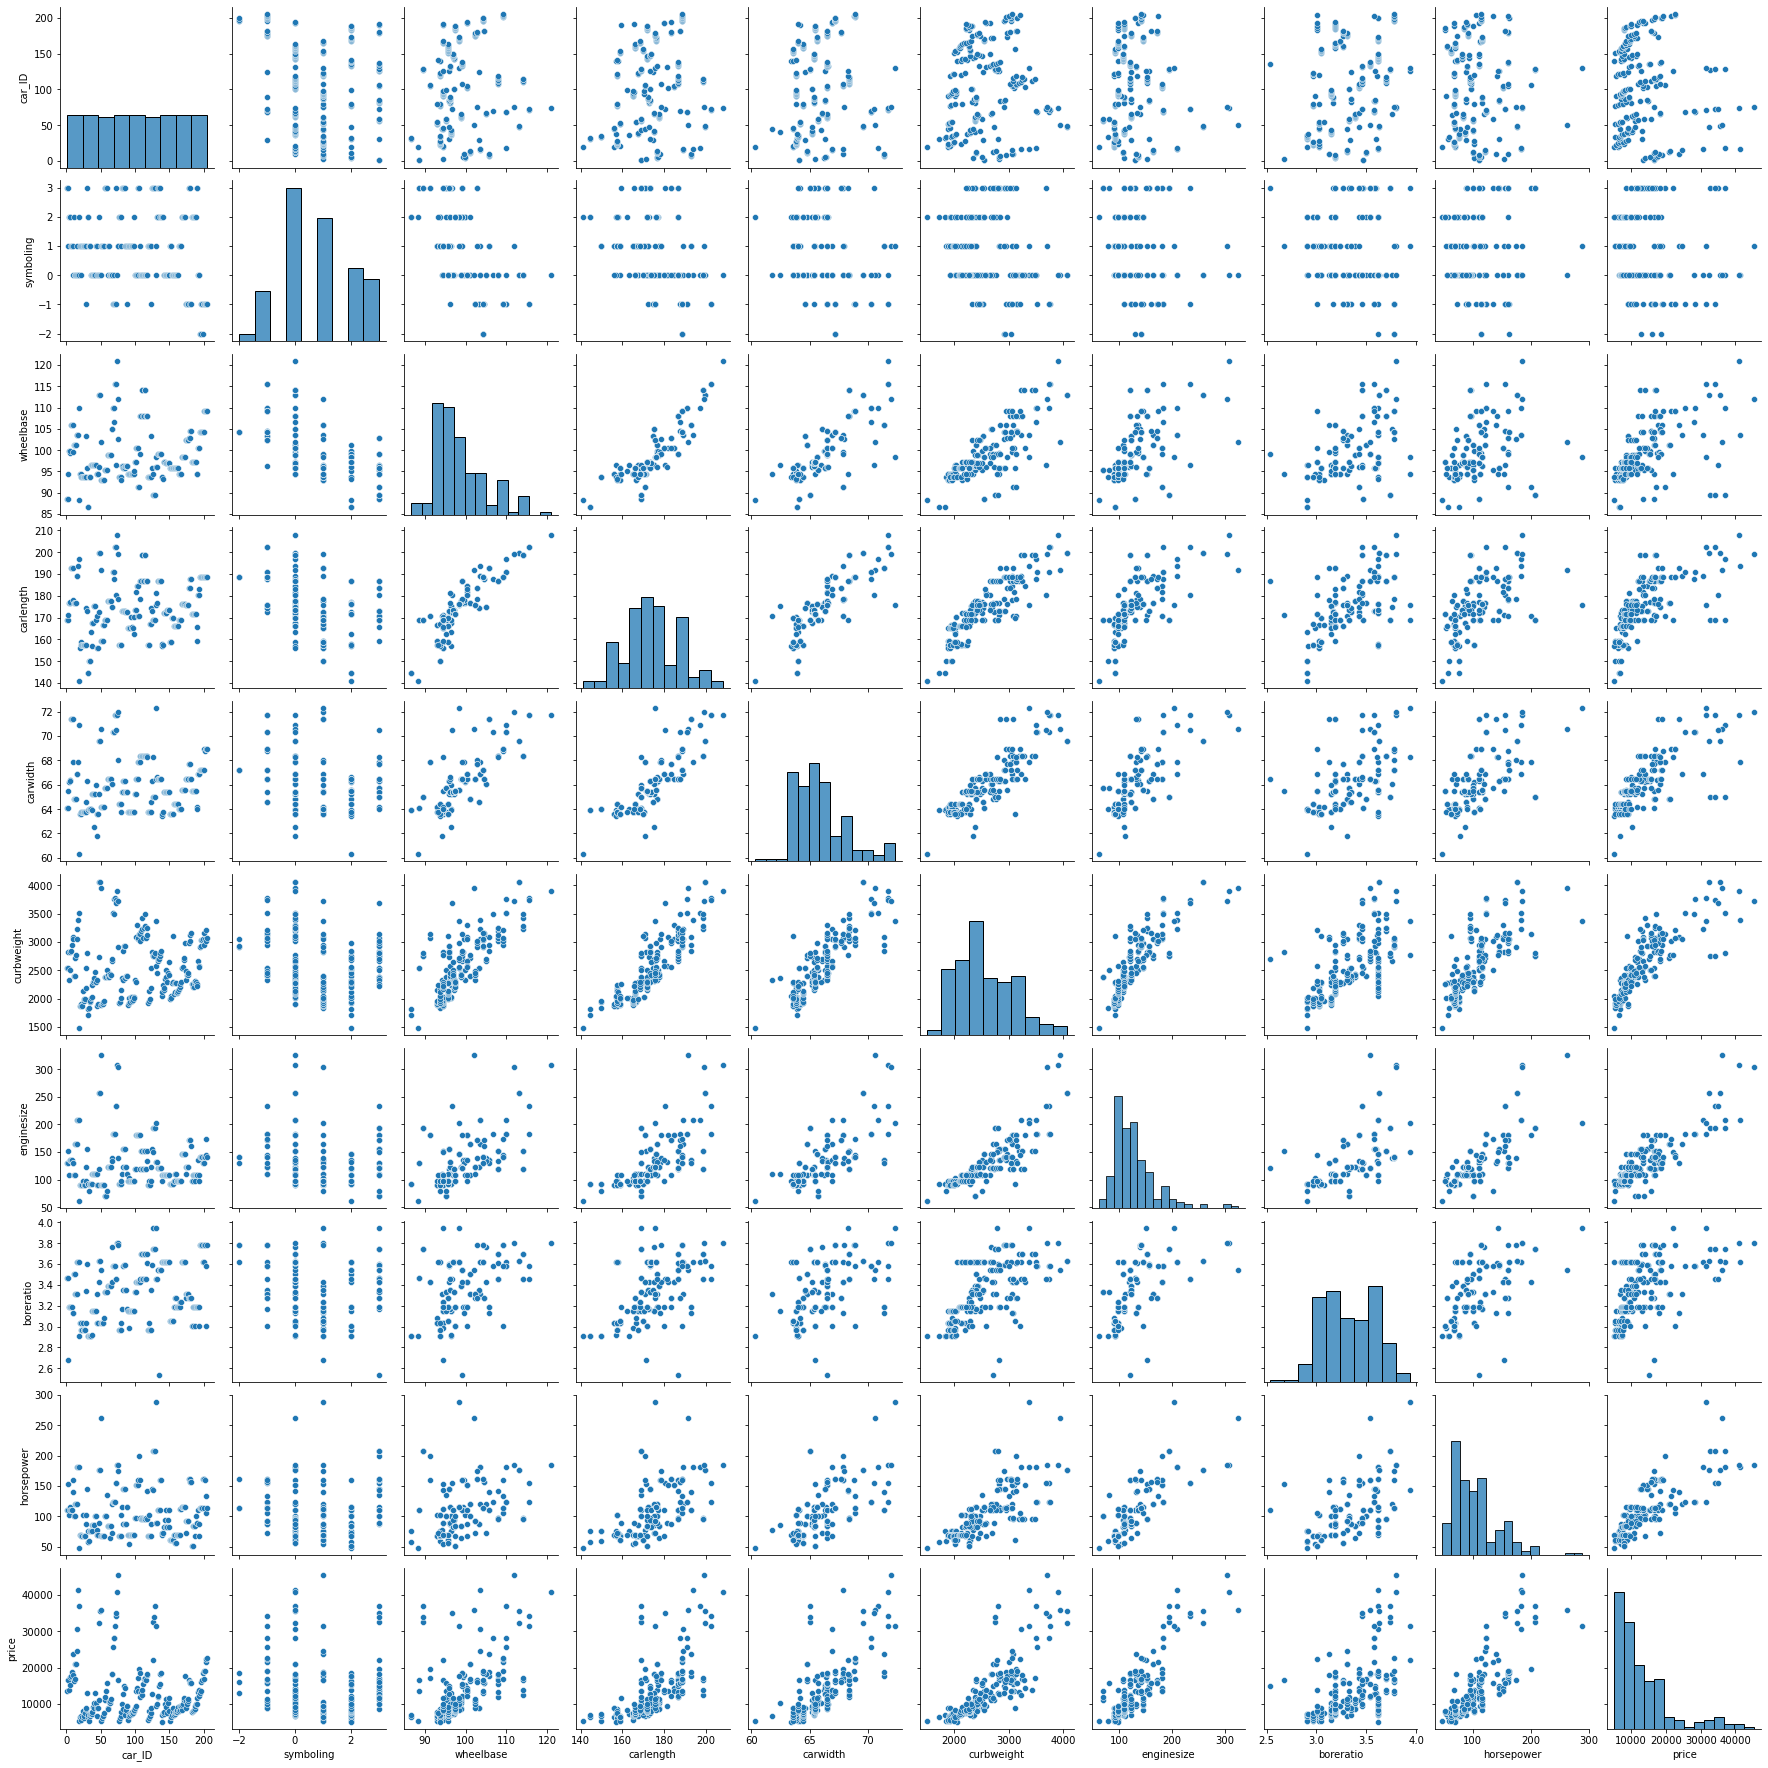

In [53]:
sns.pairplot(data_new)
plt.show()

#en sağdaki sütun price solda diğer sütunlar

#### Feature Engineering

Datayı daha iyi modellemek için yeni özellikler (feature) bulma veya özelliklerden bazılarını eleme işine **Feature Engineering** denir.

**Tork (Torque)**: 

Tork, motorun dönme kuvvetinin; araçta tekerlekleri itme kuvvetine dönüştürülmesini sağlamaktadır. Yani bir nevi, aracın çekiş gücü ile ilgilidir. 

Dolayısı ile Tork'u yüksek olan arabaların daha pahalı olması beklenebilir.

**Torque = 5252 x HP / RPM**

In [54]:
torque = data.horsepower * 5252 / data.peakrpm

In [55]:
torque

0      116.594400
1      116.594400
2      161.761600
3       97.400727
4      109.814545
          ...    
200    110.875556
201    158.550943
202    127.957818
203    115.981667
204    110.875556
Length: 205, dtype: float64

In [61]:
# dataya torque sütunu ekle

data.insert(10 , "torque",
            pd.Series(data.horsepower * 5252 / data.peakrpm , index=data.index))

# A Pandas Series, tablodaki bir sütun gibidir.
#Herhangi bir türden veriyi tutan tek boyutlu bir dizidir. 

In [67]:
data.columns 

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'torque', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [68]:
data.torque

0      116.594400
1      116.594400
2      161.761600
3       97.400727
4      109.814545
          ...    
200    110.875556
201    158.550943
202    127.957818
203    115.981667
204    110.875556
Name: torque, Length: 205, dtype: float64

Torque ile Fiyat arasındaki ilişkiye bakalım:

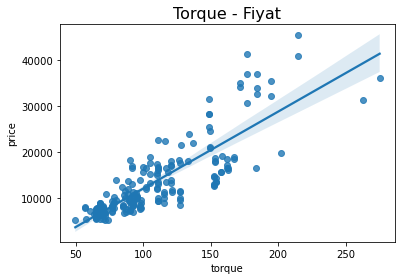

In [69]:
# Torque dağılımını görelim

plt.title("Torque - Fiyat", fontsize=16)
sns.regplot(x=data.torque, y=data.price)

plt.show()

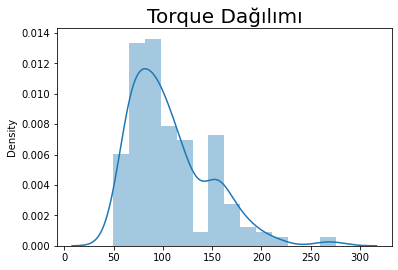

In [70]:
# Torque dağılımını görelim

plt.title("Torque Dağılımı", fontsize=20)
sns.distplot(x=data.torque)
plt.show()

**Yakıt Ekonomisi**:

Arabanın şehir içinde ve şehir dışında ortalama yakıt tüketimi.

In [71]:
data["fuelconomy"] = (0.50 * data.citympg) * (0.45 * data.highwaympg)

#fuelconomy -> sağdaki işlemi dataya yeni sütun olarak ekledik
#rastgele sayılar belirledim.

In [72]:
data.fuelconomy

0      127.575
1      127.575
2      111.150
3      162.000
4       89.100
        ...   
200    144.900
201    106.875
202     93.150
203    157.950
204    106.875
Name: fuelconomy, Length: 205, dtype: float64

Son olarak model için önemli değişkenleri bırakıp diğerlerini silelim:

In [73]:
# silinecekleri sil

data.drop(columns = ['car_ID','manufacturer',
                     'doornumber','carheight', 
                     'compressionratio','peakrpm',
                     'symboling','stroke','citympg',
                     'highwaympg','fuelsystem'], 
                axis=1 , inplace=True)

In [74]:
data.columns

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'torque', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower',
       'price', 'fuelconomy'],
      dtype='object')

In [75]:
len(data.columns)

17

In [76]:
data.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,torque,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,fuelconomy
0,gas,std,convertible,rwd,front,88.6,116.594400,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,127.575
1,gas,std,convertible,rwd,front,88.6,116.594400,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,127.575
2,gas,std,hatchback,rwd,front,94.5,161.761600,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,111.150
3,gas,std,sedan,fwd,front,99.8,97.400727,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,162.000
4,gas,std,sedan,4wd,front,99.4,109.814545,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,89.100


#### Model Tanımlama

In [77]:
# data'yı kopyala

cars = data.copy()

Kategorik değişkenler için dummy variable'ları alalım:

**pd.get_dummies()**

In [78]:
# kategorik sütunlar

dummies_list = ['fueltype', 'aspiration', 'carbody','drivewheel',
                'enginelocation', 'enginetype', 'cylindernumber']

In [79]:
for i in dummies_list:
    
    temp_df = pd.get_dummies(eval('cars' + '.' + i), drop_first=True)
    
    cars = pd.concat([cars, temp_df], axis=1)
    
    cars.drop([i], axis=1, inplace=True)

pd.concat -> pandas.concat() işlevi , diğer eksenlerde dizinlerin (varsa) isteğe bağlı küme mantığını (birleşim veya kesişim) 
gerçekleştirirken, Pandas nesnelerinin bir ekseni ile birlikte birleştirme işlemleri gerçekleştirmenin tüm ağır yükünü kaldırır .    

get_dummies -> Kategorik değişkeni dummy/indicator değişkenlerine dönüştürür. 
eval -> çeşitli arka uçları kullanarak bir Python ifadesini bir dize olarak değerlendirmek için kullanılır. 

In [81]:
cars.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fuelconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,88.6,116.594400,168.8,64.1,2548,130,3.47,111,13495.0,127.575,...,0,0,0,0,0,1,0,0,0,0
1,88.6,116.594400,168.8,64.1,2548,130,3.47,111,16500.0,127.575,...,0,0,0,0,0,1,0,0,0,0
2,94.5,161.761600,171.2,65.5,2823,152,2.68,154,16500.0,111.150,...,0,0,1,0,0,0,1,0,0,0
3,99.8,97.400727,176.6,66.2,2337,109,3.19,102,13950.0,162.000,...,1,0,0,0,0,1,0,0,0,0
4,99.4,109.814545,176.6,66.4,2824,136,3.19,115,17450.0,89.100,...,1,0,0,0,1,0,0,0,0,0


In [82]:
cars.shape

(205, 31)

In [83]:
# data'daki sütunlar
data.columns

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'torque', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower',
       'price', 'fuelconomy'],
      dtype='object')

In [84]:
cars.columns

Index(['wheelbase', 'torque', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'price', 'fuelconomy', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', 'two'],
      dtype='object')

pd.get_dummies(drop_first=True) yaptığımız için verdiğimiz listedeki sütunlar için 1-0 (one-hot encoding) sütunları yarattı. 

Her bir kategor için bir sütun olarak, sadece birer eksik olarak. (drop_first=True)

In [85]:
# std'yi atmış, sadece turbo adında bir sütun yaratmış
# baz değişken -> std

data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

**drop_first ilk değişkeni eler. biri 0 biri 1 olacak zaten.**

In [93]:
# convertible'ı atmış, diğerleri için sütun yaratmış
# baz değişken -> convertible

data.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [94]:
# 4wd'yi atmış, diğerleri için sütun yaratmış 
# baz değişken -> 4wd

data.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [95]:
# eight'i atmış diğerlerini almış
# baz değişken -> eight

data.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

##### Train-Test Split

In [96]:
from sklearn.model_selection import train_test_split

In [99]:
train_data, test_data = train_test_split(cars, train_size=0.7,random_state=50)

#train_size -> öğrenme büyüklüğü %70 i öğrenme datası %30 u test datası
#random_state -> rastgele bir değer giriyoruz. bunu girmessek her seferinde farklı sonuçlar verir.

In [100]:
train_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fuelconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
77,93.7,64.933818,157.3,64.4,1944,92,2.97,68,6189.0,265.050,...,1,0,0,0,0,1,0,0,0,0
153,95.7,67.838333,169.7,63.6,2280,92,3.05,62,6918.0,258.075,...,1,0,0,0,0,1,0,0,0,0
143,97.2,94.940000,172.0,65.4,2340,108,3.62,94,9960.0,187.200,...,0,1,0,0,0,1,0,0,0,0
57,95.3,88.408667,169.0,65.7,2385,70,3.33,101,13645.0,87.975,...,0,0,0,1,0,0,0,0,0,1
131,96.1,92.682353,176.8,66.6,2460,132,3.46,90,9895.0,160.425,...,1,0,0,0,0,1,0,0,0,0


In [101]:
train_data.columns

Index(['wheelbase', 'torque', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'price', 'fuelconomy', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', 'two'],
      dtype='object')

**Scaling**   2 tür scaling metodu vardır.

Değişken boyutlarının farklı olması bir sorundur. Bunun için hepsi kendi içinde boyutlandırılır.

Min-Max Scaling -> 0 ile 1 arasında yeniden boyutlar:
$$X_{scaled} = (X - X_{min}) / (X_{max} - X_{min}) $$

burada:

$X_{minScaled} = 0$

ve

$X_{maxScaled} = 1$

olur.

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler = MinMaxScaler()   #scaler nesnesi oluşturma.

In [125]:
# numerik kolonları scale edelim
# price hariç -> price (y) değişkeni scale edilmez

scale_cols = ['wheelbase', 'torque', 'carlength', 'carwidth','curbweight','enginesize','horsepower','boreratio','fuelconomy']

In [126]:
train_data[scale_cols] = scaler.fit_transform(train_data[scale_cols])

In [127]:
train_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fuelconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
77,0.244828,0.068667,0.263415,0.341667,0.176881,0.116981,0.307143,0.083333,6189.0,0.394639,...,1,0,0,0,0,1,0,0,0,0
153,0.313793,0.081532,0.465041,0.275000,0.307215,0.116981,0.364286,0.058333,6918.0,0.381856,...,1,0,0,0,0,1,0,0,0,0
143,0.365517,0.201570,0.502439,0.425000,0.330489,0.177358,0.771429,0.191667,9960.0,0.251959,...,0,1,0,0,0,1,0,0,0,0
57,0.300000,0.172642,0.453659,0.450000,0.347944,0.033962,0.564286,0.220833,13645.0,0.070103,...,0,0,0,1,0,0,0,0,0,1
131,0.327586,0.191571,0.580488,0.525000,0.377036,0.267925,0.657143,0.175000,9895.0,0.202887,...,1,0,0,0,0,1,0,0,0,0


In [129]:
y_train= train_data.pop('price')

#pop(), öğeyi belirtilen konumda kaldırır.

KeyError: 'price'

In [130]:
y_train.head()

77      6189.0
153     6918.0
143     9960.0
57     13645.0
131     9895.0
Name: price, dtype: float64

In [131]:
X_train = train_data

In [132]:
train_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fuelconomy,gas,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
77,0.244828,0.068667,0.263415,0.341667,0.176881,0.116981,0.307143,0.083333,0.394639,1,...,1,0,0,0,0,1,0,0,0,0
153,0.313793,0.081532,0.465041,0.275000,0.307215,0.116981,0.364286,0.058333,0.381856,1,...,1,0,0,0,0,1,0,0,0,0
143,0.365517,0.201570,0.502439,0.425000,0.330489,0.177358,0.771429,0.191667,0.251959,1,...,0,1,0,0,0,1,0,0,0,0
57,0.300000,0.172642,0.453659,0.450000,0.347944,0.033962,0.564286,0.220833,0.070103,1,...,0,0,0,1,0,0,0,0,0,1
131,0.327586,0.191571,0.580488,0.525000,0.377036,0.267925,0.657143,0.175000,0.202887,1,...,1,0,0,0,0,1,0,0,0,0


**Çoklu Lineer Regreson için kütüphaneler:**

In [133]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm   #ols için

In [135]:
# lineer regresyon nesnesi alalım

lr= LinearRegression()

In [136]:
# lineer regresyon'u veri ile train (fit) edelim
lr.fit(X_train, y_train)

#fit etmek -> öğretmek

LinearRegression()

**RFE (Recursive Feature Elimination)**:

Her seferinde bir değişken azaltarak (backward elimination) geriye doğru Çoklu Lineer Regresyon çalıştırır.

Bu şekilde eleme yaparak parametre olarak verilen `n_features_to_select` adedine kadar gelir.

Her elemede en önemsiz olanı eler. (p-değeri en büyük olanı yani)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [143]:
# RFE'yi hazırlayalım
# RFE(estimator, n_features_to_select)

# geriye 10 adet değişken bırakacak şekilde RFE tanımlayalım

rfe = RFE(lr, n_features_to_select=10)

In [144]:
# rfe'yi train edelim

rfe = rfe.fit(X_train, y_train)

RFE'nin attribute'ları:

**ranking_**: Seçim sırası, en baştaki (rank=1) en yüksek önemde.

**support_**: Değişken seçilmiş mi -> True, False.

In [145]:
rfe.support_  #10 tane True

array([False,  True, False, False,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True, False])

In [146]:
rfe.ranking_     #10 tane 1 

array([ 8,  1,  7,  6,  1,  1, 13,  1,  9, 18, 21, 12, 14, 16, 15, 17, 11,
        1,  1, 10, 20, 19,  4,  5,  1,  1,  1,  3,  1,  2])

In [147]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 8),
 ('torque', True, 1),
 ('carlength', False, 7),
 ('carwidth', False, 6),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 13),
 ('horsepower', True, 1),
 ('fuelconomy', False, 9),
 ('gas', False, 18),
 ('turbo', False, 21),
 ('hardtop', False, 12),
 ('hatchback', False, 14),
 ('sedan', False, 16),
 ('wagon', False, 15),
 ('fwd', False, 17),
 ('rwd', False, 11),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 10),
 ('ohc', False, 20),
 ('ohcf', False, 19),
 ('ohcv', False, 4),
 ('rotor', False, 5),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 3),
 ('twelve', True, 1),
 ('two', False, 2)]

In [148]:
# sadece seçilmiş sütunlar (değişkenler)

X_train.columns[rfe.support_]

Index(['torque', 'curbweight', 'enginesize', 'horsepower', 'rear', 'dohcv',
       'five', 'four', 'six', 'twelve'],
      dtype='object')

In [149]:
# Dolayısı ile artık önemli olan sütunları biliyoruz

X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [150]:
X_train_rfe

,torque,curbweight,enginesize,horsepower,rear,dohcv,five,four,six,twelve
77,0.068667,0.176881,0.116981,0.083333,0,0,0,1,0,0
153,0.081532,0.307215,0.116981,0.058333,0,0,0,1,0,0
143,0.201570,0.330489,0.177358,0.191667,0,0,0,1,0,0
57,0.172642,0.347944,0.033962,0.220833,0,0,0,0,0,0
131,0.191571,0.377036,0.267925,0.175000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
132,0.268460,0.453840,0.226415,0.258333,0,0,0,1,0,0
33,0.075716,0.175330,0.116981,0.116667,0,0,0,1,0,0
109,0.232348,0.675718,0.222642,0.204167,0,0,0,1,0,0
139,0.167003,0.245151,0.177358,0.104167,0,0,0,1,0,0


#### OLS Analizi:

In [164]:
# OLS için kopyalayalım

X_train_rfemodel = X_train_rfe.copy()

In [165]:
# statsmodels için add_constant -> beta_0 için 1'lerden oluşan sütun

X_train_rfemodel = sm.add_constant(X_train_rfemodel)

In [166]:
# OLS çalıştıralım

lr = sm.OLS(y_train, X_train_rfemodel).fit()

In [167]:
# özeti görelim
#0.05 den büyük olanlar önemsiz drop edicez.

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           9.54e-59
Time:                        19:19:01   Log-Likelihood:                -1328.0
No. Observations:                 143   AIC:                             2678.
Df Residuals:                     132   BIC:                             2711.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5778.5051   1266.951      4.561      0.0

Burada ilk gördüğümüz `two` isimli değişkenin p-değerinin 0.05'ten büyük olduğu.

Dolayısı ile önemsizdir, çıkarabiliriz onu.

In [169]:
X_train_rfemodel = X_train_rfemodel.drop(['two'],axis=1)

KeyError: "['two'] not found in axis"

In [171]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           9.54e-59
Time:                        19:20:16   Log-Likelihood:                -1328.0
No. Observations:                 143   AIC:                             2678.
Df Residuals:                     132   BIC:                             2711.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5778.5051   1266.951      4.561      0.0

Tekrar bir OLS çalıştıracağız.

Bunu bir fonksiyon içinde yapalım:

In [172]:
def train_ols(X,y):
    X=sm.add_constant(X)
    lr = sm.OLS(y,X).fit()
    print(lr.summary())

In [173]:
# şimdi çağıralım
train_ols(X_train_rfemodel, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           9.54e-59
Time:                        19:21:20   Log-Likelihood:                -1328.0
No. Observations:                 143   AIC:                             2678.
Df Residuals:                     132   BIC:                             2711.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5778.5051   1266.951      4.561      0.0

Şimdi de `dohcv` değişkeni önemsiz.

Onu eleyip tekrar OLS çalıştıralım:

In [174]:
X_train_rfemodel = X_train_rfemodel.drop(['dohcv'],axis=1)
train_ols(X_train_rfemodel, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     121.2
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           1.22e-59
Time:                        19:24:47   Log-Likelihood:                -1328.4
No. Observations:                 143   AIC:                             2677.
Df Residuals:                     133   BIC:                             2706.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5706.1402   1263.053      4.518      0.0

Artık geriye kalan değişkenlerin hepsi de önemli.

Burada durabiliriz.

#### Katsayıların Önem Sırası

In [177]:
X_train.columns
#tüm kolonlar

Index(['wheelbase', 'torque', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'fuelconomy', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two'],
      dtype='object')

In [179]:
X_train_final = X_train[['torque','curbweight','enginesize',
                         'horsepower' ,'rear' ,'five',
                         'four','six','twelve']]

In [180]:
X_train_final.columns

Index(['torque', 'curbweight', 'enginesize', 'horsepower', 'rear', 'five',
       'four', 'six', 'twelve'],
      dtype='object')

In [181]:
X_train_final.head()

,torque,curbweight,enginesize,horsepower,rear,five,four,six,twelve
77,0.068667,0.176881,0.116981,0.083333,0,0,1,0,0
153,0.081532,0.307215,0.116981,0.058333,0,0,1,0,0
143,0.201570,0.330489,0.177358,0.191667,0,0,1,0,0
57,0.172642,0.347944,0.033962,0.220833,0,0,0,0,0
131,0.191571,0.377036,0.267925,0.175000,0,0,1,0,0


In [182]:
lr_final= LinearRegression()
lr_final.fit(X_train_final, y_train)

LinearRegression()

In [184]:
lr_final.coef_    #katsayılar

array([-13242.22638687,  14984.52060148,  24766.37841313,  15943.29337346,
        13128.91709061,  -3188.26405593,  -5522.0209464 ,  -5889.09720693,
        -9756.67081001])

In [187]:
#daha güzel yazdırma işlemi
katsayilar = pd.DataFrame(lr_final.coef_,index = ['torque','curbweight','enginesize',
                         'horsepower' ,'rear' ,'five',
                         'four','six','twelve'],columns=['Katsayı'])
katsayilar.sort_values(by=['Katsayı'], ascending=False)

,Katsayı
enginesize,24766.378413
horsepower,15943.293373
curbweight,14984.520601
rear,13128.917091
five,-3188.264056
four,-5522.020946
six,-5889.097207
twelve,-9756.670810
torque,-13242.226387


Görüldüğü gibi en önemli değişkenler sırasıyla:

* enginesize
* rear
* curbweight
* horsepower
* four
* six
* twelve
* five

**Son Analizler:**

**1- Fiyatı en çok artıran değişken `enginesize`.**

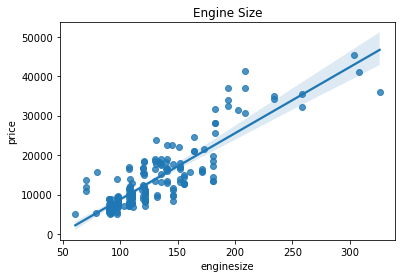

In [189]:
plt.title('Engine Size')
sns.regplot(x=data.enginesize, y=data.price)
plt.show()

**2- `rear` değişkeni enginelocation'dan geldi.**

enginelocation -> ['front', 'rear']

Buna göre motorun arkada olması fiyatı artırıyor.

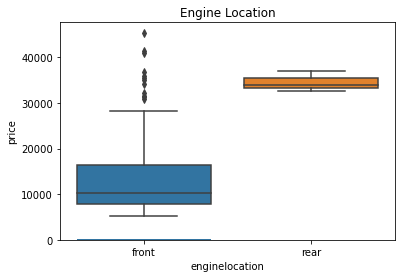

In [191]:
plt.title('Engine Location')
sns.countplot(data.enginelocation)
sns.boxplot(x=data.enginelocation,y=data.price)
plt.show()

**3- `curbweight` yani aracın ağırlığı fiyatı artırıyor.**

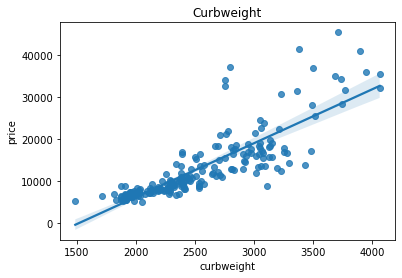

In [195]:
plt.title('Curbweight')
sns.regplot(x=data.curbweight, y=data.price)
plt.show()



**4- `horsepower` yani beygir gücü fiyatı artırıyor.**

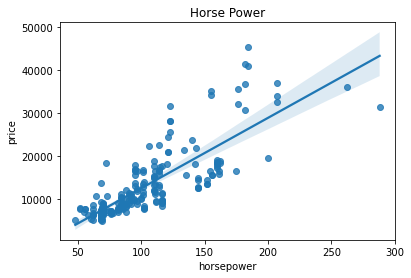

In [198]:
plt.title('Horse Power')
sns.regplot(x=data.horsepower, y=data.price)
plt.show()

**5- `five -four - six - twelve` değişkenleri `cylindernumber` dan geliyor.**

cylindernumber -> ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']

baz değişken -> eight

Şu şekilde yorumlarız (baz değişken üzerinden):
* eight'i seçmeyip four'u seçersen: fiyattaki değişim -> -5822.569199
    
* eight'i seçmeyip six'i seçersen: fiyattaki değişim -> -5865.064165
    
* eight'i seçmeyip twelve'i seçersen: fiyattaki değişim -> -9547.252789

* eight'i seçmeyip five'ı seçersen: fiyattaki değişim -> -3188.264056

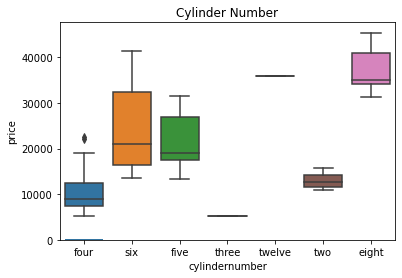

In [200]:
plt.title('Cylinder Number')
sns.countplot(data.cylindernumber)
sns.boxplot(x=data.cylindernumber,y=data.price)
plt.show()